# <span style="color:#FFC65F;">**SCRAPING DATA FROM TRADINGVIEW & DATA ANALYSIS**</span>
### Class: Artificial Intelligence in the Era of Digital Transformation - ML33


| Student Name            | Student ID   |
|-------------------------|--------------|
| Lê Hoàng Quân           | 2015535486   |
| Nguyễn Hoàng Thủy Tiên  | 2015535602   | 

## PART 1: IMPORTING DATA FROM TRADINGVIEW AND PERFORM CLEANING

### <span style="color:#F6CCFD;">**1.1. IMPORTING DATA FROM TRADINGVIEW**</span>

#### The data source has up to 5000 rows of data, however, we only scrape the first 500 rows since it's faster to run. Therefore, the final result can be biased due to the smaller sample data

In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns

# Starting Chrome
driver = webdriver.Chrome()

# Open Tradingview
driver.get("https://www.tradingview.com/markets/stocks-usa/market-movers-all-stocks/")

# Maximum times of pressing "Load More"
max_loads = 5

loads = 0
data_rows = []

while loads < max_loads:
    try:
        load_more_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, ".loadButton-SFwfC2e0")))
        load_more_button.click()
        loads += 1
    except:
        break

# Wait for all data to be loaded
WebDriverWait(driver, 10).until(EC.invisibility_of_element_located((By.CSS_SELECTOR, ".loadingContent-2CAlGV8F")))

# Create a variable "soup1" from the loaded website
soup1 = BeautifulSoup(driver.page_source, 'html.parser')

# Extract the data and add it to the data stream list
row_data = soup1.find_all('tr', class_='row-RdUXZpkv')
for row in row_data:
    row_data = row.find_all('td')
    individual_row = [data.text.strip() for data in row_data]
    if len(individual_row) == 11:  # Kiểm tra xem có đủ dữ liệu không
        data_rows.append(individual_row)

# Create a DataFrame from the list of data rows
data_for_all = pd.DataFrame(data_rows, columns=["Stock", "Price", "Change", "Volume", "Market Cap", "PE Ratio", "EPS", "Dividend", "Yield", "Sector", "Recommendation"])

# Close the browser after completed
driver.quit()

<span style="color:#FCF588;">**SHOW DATA**</span>

In [5]:
data_for_all

,Stock,Price,Change,Volume,Market Cap,PE Ratio,EPS,Dividend,Yield,Sector,Recommendation
0,"AAgilent Technologies, Inc.D",111.41 USD,1.53%,2.051M,32.597B USD,29.22,3.81 USD,−13.21%,0.79%,Health Technology,Buy
1,AAAlcoa CorporationD,28.35 USD,1.72%,5.097M,5.059B USD,—,−8.15 USD,−259.86%,1.41%,Non-Energy Minerals,Neutral
2,AACAres Acquisition CorporationD,10.73 USD,−0.14%,4.869K,757.231M USD,—,−0.09 USD,−134.01%,0.00%,Finance,—
3,AACIArmada Acquisition Corp. ID,10.70 USD,0.00%,199,98.636M USD,—,−0.03 USD,86.19%,0.00%,Finance,—
4,AACTAres Acquisition Corporation IID,10.26 USD,−0.05%,104.531K,513M USD,—,—,—,0.00%,Finance,—
...,...,...,...,...,...,...,...,...,...,...,...
495,AXTIAXT IncD,2.35 USD,0.43%,146.862K,102.594M USD,—,−0.04 USD,−110.31%,0.00%,Electronic Technology,Buy
496,AYAtlantica Sustainable Infrastructure plcD,20.75 USD,−1.80%,1.046M,2.408B USD,170.08,0.12 USD,—,8.58%,Utilities,Buy
497,"AYIAcuity Brands, Inc.D",164.67 USD,0.50%,275.039K,5.136B USD,14.17,11.62 USD,11.81%,0.32%,Producer Manufacturing,Buy
498,"AAYROAYRO, Inc.D",2.62 USD,1.73%,22.893K,12.38M USD,—,−5.12 USD,22.59%,0.00%,Producer Manufacturing,—


### <span style="color:#F6CCFD;">**1.2. CLEANING DATA FOR THE COLUMNS: PRICE, VOLUME, MARKET CAP FOR USE**</span>

#### <span style="color:#B4F3FC;">**1.2.1. REMOVING CHARACTERS FROM CELLS WITH VALUE AND CONVERT THEM FROM OBJECT TO FLOAT64 DATA TYPE**</span>

In [6]:
# List of columns with 'USD'
usd_columns = ["Price", "Market Cap", "EPS"]

# Convert data values to string data type and remove 'USD'
for column in usd_columns:
    data_for_all[column] = data_for_all[column].astype(str).str.replace(' USD', '')

In [7]:
data_for_all.fillna(0, inplace=True)
data_for_all.isnull().sum()

Stock             0
Price             0
Change            0
Volume            0
Market Cap        0
PE Ratio          0
EPS               0
Dividend          0
Yield             0
Sector            0
Recommendation    0
dtype: int64

In [8]:
# Converting data symbols
def convert_volume(value):
    if 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'B' in value:
        return float(value.replace('B', '')) * 1e9
    elif 'K' in value:
        return float(value.replace('K', '')) * 1e3
    else:
        return float(value)

# Apply formula to column "Volume"
data_for_all['Volume'] = data_for_all['Volume'].apply(convert_volume)

In [9]:
def convert_market_cap(value):
    if 'T' in value:
        return float(value.replace('T', '')) * 1e12  # Converting T (Trillion) to number multiplied by 10^12
    elif 'B' in value:
        return float(value.replace('B', '')) * 1e9   # Converting B (Billion) to number multiplied by 10^9
    elif 'M' in value:
        return float(value.replace('M', '')) * 1e6   # Converting M (Million) to number multiplied by 10^6
    elif 'K' in value:
        return float(value.replace('K', '')) * 1e3   # Converting K to number multiplied by 10^3
    else:
        return float(value)

# Apply formula to column "Market Cap"
data_for_all['Market Cap'] = data_for_all['Market Cap'].apply(convert_market_cap)

#### <span style="color:#B4F3FC;">**1.2.2. CLEANING DATA VALUES BY REMOVING OUTLIERS**</span>

In [10]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl

In [11]:
# Check data type for all columns
data_for_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Stock           500 non-null    object 
 1   Price           500 non-null    object 
 2   Change          500 non-null    object 
 3   Volume          500 non-null    float64
 4   Market Cap      500 non-null    float64
 5   PE Ratio        500 non-null    object 
 6   EPS             500 non-null    object 
 7   Dividend        500 non-null    object 
 8   Yield           500 non-null    object 
 9   Sector          500 non-null    object 
 10  Recommendation  500 non-null    object 
dtypes: float64(2), object(9)
memory usage: 43.1+ KB


<span style="color:#FCF588;">**DRAWING ORIGINAL DATA BOX PLOTS FOR COLUMNS: PRICE, VOLUME, MARKET CAP**</span>

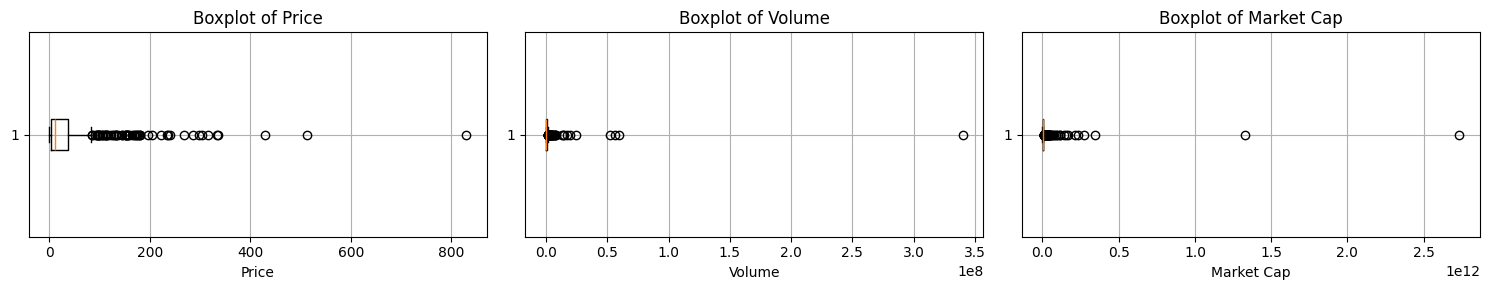

In [12]:
# Convert the Price column to numeric data
data_for_all['Price'] = pd.to_numeric(data_for_all['Price'], errors='coerce')

# Create a single figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 3))

# Boxplot for Price
axs[0].boxplot(data_for_all['Price'], vert=False)
axs[0].set_title('Boxplot of Price')
axs[0].set_xlabel('Price')
axs[0].grid(True)

# Boxplot for Volume
axs[1].boxplot(data_for_all['Volume'], vert=False)
axs[1].set_title('Boxplot of Volume')
axs[1].set_xlabel('Volume')
axs[1].grid(True)

# Boxplot for Market Cap
axs[2].boxplot(data_for_all['Market Cap'], vert=False)
axs[2].set_title('Boxplot of Market Cap')
axs[2].set_xlabel('Market Cap')
axs[2].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure with subplots
plt.show()

<span style="color:#B4F3FC;">**COMMENTS**</span>
*We can see that the dataset still has a lot of outliers, especially for the Volume and Market Cap columns.
For the Price dataset: The median is at around point 30% quartile of the dataset. The outliers larger than the upper whisker range from around 100 to more than 800 USD/stock. 
For the Volume and Market Cap datasets: The outliers account for a large number in the dataset, making the box plot barely visible.
As a result, this dataset needs cleaning thoroughly before we can analyze them.*

<span style="color:#FCF588;">**CALCULATING SKEW, STANDARD DEVIATION AND VARIANCE FOR THE 3 DATASETS**</span>

In [13]:
# Check the Skew, Standard Deviation and Variance of Stock Price
price_skew = data_for_all['Price'].skew()
price_std_deviation = data_for_all['Price'].std()
price_variance = data_for_all['Price'].var()

print(f'Price Skew: {price_skew:.2f}')
print(f'Standard Deviation of Price: {price_std_deviation:.2f}')
print(f'Variance of Price: {price_variance:.2f}')

# Check the Skew, Standard Deviation and Variance of Stock Volume
volume_skew = data_for_all['Volume'].skew()
volume_std_deviation = data_for_all['Volume'].std()
volume_variance = data_for_all['Volume'].var()

print(f'Volume Skew: {volume_skew:.2f}')
print(f'Standard Deviation of Volume: {volume_std_deviation:.2f}')
print(f'Variance of Volume: {volume_variance:.2f}')

# Check the Skew, Standard Deviation and Variance of Stock's Market Cap
marketcap_skew = data_for_all['Market Cap'].skew()
marketcap_std_deviation = data_for_all['Market Cap'].std()
marketcap_variance = data_for_all['Market Cap'].var()

print(f'Market Cap Skew: {marketcap_skew:.2f}')
print(f'Standard Deviation of Market Cap: {marketcap_std_deviation:.2f}')
print(f'Variance of Market Cap: {marketcap_variance:.2f}')

Price Skew: 4.95
Standard Deviation of Price: 71.17
Variance of Price: 5065.32
Volume Skew: 19.62
Standard Deviation of Volume: 15895150.03
Variance of Volume: 252655794528159.56
Market Cap Skew: 16.98
Standard Deviation of Market Cap: 138450704450.22
Variance of Market Cap: 19168597562761626517504.00


<span style="color:#FCF588;">**REMOVING OUTLIERS**</span>

In [14]:
# Perform cleaning for Price
data_for_all = data_for_all[data_for_all["Price"]<data_for_all["Price"].quantile(0.95)].reset_index(drop=True)

# Perform cleaning for Volume
data_for_all = data_for_all[data_for_all['Volume']<data_for_all['Volume'].quantile(0.95)].reset_index(drop=True)

# Perform cleaning on market cap
data_for_all = data_for_all[data_for_all['Market Cap']<data_for_all['Market Cap'].quantile(0.95)].reset_index(drop=True)

<span style="color:#FCF588;">**CALCULATING DATA SKEW AFTER REMOVING OUTLIERS**</span>

In [15]:
price_skew = data_for_all['Price'].skew()
print(f'Price Skew: {price_skew:.2f}')
volume_skew = data_for_all['Volume'].skew()
print(f'Volume Skew: {volume_skew:.2f}')
marketcap_skew = data_for_all['Market Cap'].skew()
print(f'Market Cap Skew: {marketcap_skew:.2f}')

Price Skew: 2.64
Volume Skew: 2.40
Market Cap Skew: 2.37


<span style="color:#FCF588;">**DRAWING DATA BOX PLOTS FOR COLUMNS: PRICE, VOLUME, MARKET CAP AFTER REMOVING OUTLIERS**</span>

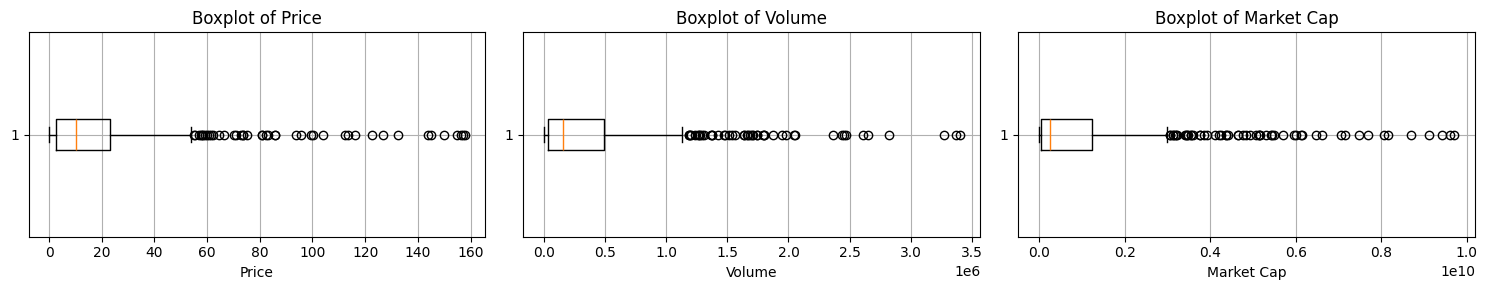

In [16]:
# Create a single figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 3))

# Boxplot for Price
axs[0].boxplot(data_for_all['Price'], vert=False)
axs[0].set_title('Boxplot of Price')
axs[0].set_xlabel('Price')
axs[0].grid(True)

# Boxplot for Volume
axs[1].boxplot(data_for_all['Volume'], vert=False)
axs[1].set_title('Boxplot of Volume')
axs[1].set_xlabel('Volume')
axs[1].grid(True)

# Boxplot for Market Cap
axs[2].boxplot(data_for_all['Market Cap'], vert=False)
axs[2].set_title('Boxplot of Market Cap')
axs[2].set_xlabel('Market Cap')
axs[2].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure with subplots
plt.show()

<span style="color:#B4F3FC;">**COMMENTS**</span>
*We can see that after cleaning, the box plots for Volume and Market Cap has better visibility. Due to the characteristics of the dataset, outliers mostly focus on the right side of the upper whisker.
From the length of the box plots, we can see that Stock Prices are usually more similar than Stock's Volumes and Market Caps.*

<span style="color:#FCF588;">**DATASET AFTER CLEANING**</span>
*After cleaning, the dataset has 72 data rows removed, making it decrease from 500 to 428 data rows, as shown below.*

In [17]:
# Show data after cleaning data in Price, Volume and Market Cap columns
data_for_all

,Stock,Price,Change,Volume,Market Cap,PE Ratio,EPS,Dividend,Yield,Sector,Recommendation
0,AACAres Acquisition CorporationD,10.73,−0.14%,4869.0,7.572310e+08,—,−0.09,−134.01%,0.00%,Finance,—
1,AACIArmada Acquisition Corp. ID,10.70,0.00%,199.0,9.863600e+07,—,−0.03,86.19%,0.00%,Finance,—
2,AACTAres Acquisition Corporation IID,10.26,−0.05%,104531.0,5.130000e+08,—,—,—,0.00%,Finance,—
3,"AADIAadi Bioscience, Inc.D",4.99,−3.85%,189059.0,1.223540e+08,—,−2.43,78.78%,0.00%,Health Technology,Strong Buy
4,AAMCAltisource Asset Management Corp ComD,6.90,−2.54%,49492.0,1.213300e+07,—,−8.40,−1126.79%,0.00%,Finance,—
...,...,...,...,...,...,...,...,...,...,...,...
423,AXTAAxalta Coating Systems Ltd.D,26.92,1.47%,1983000.0,5.968000e+09,26.26,1.02,11.97%,0.00%,Process Industries,Buy
424,AXTIAXT IncD,2.35,0.43%,146862.0,1.025940e+08,—,−0.04,−110.31%,0.00%,Electronic Technology,Buy
425,AYAtlantica Sustainable Infrastructure plcD,20.75,−1.80%,1046000.0,2.408000e+09,170.08,0.12,—,8.58%,Utilities,Buy
426,"AAYROAYRO, Inc.D",2.62,1.73%,22893.0,1.238000e+07,—,−5.12,22.59%,0.00%,Producer Manufacturing,—


## PART 2: ANALYZING THE RELATIONSHIP BETWEEN DIFFERENT VARIABLES

### <span style="color:#F6CCFD;">**2.1. COUNTING NUMBER OF STOCK PER SECTOR AND DISTRIBUTION OF STOCK VOLUME GROUPS**</span>

#### <span style="color:#B4F3FC;">**2.1.1. COUNTING DISTRIBUTION OF STOCK VOLUMES WITHIN 5 DIFFERENT RANGES**</span>

In [18]:
# Count values lower than 100,000
count_below_100k = len(data_for_all[data_for_all['Volume'] < 100000])

# Count values between 100,000 and 1 million
count_between_100k_and_300k = len(data_for_all[(data_for_all['Volume'] >= 100000) & (data_for_all['Volume'] < 300000)])

# Count values between 100,000 and 1 million
count_between_300k_and_500k = len(data_for_all[(data_for_all['Volume'] >= 300000) & (data_for_all['Volume'] < 500000)])

# Count values between 100,000 and 1 million
count_between_500k_and_1m = len(data_for_all[(data_for_all['Volume'] >= 500000) & (data_for_all['Volume'] < 1000000)])

# Count values larger than 1 million
count_above_1m = len(data_for_all[data_for_all['Volume'] >= 1000000])

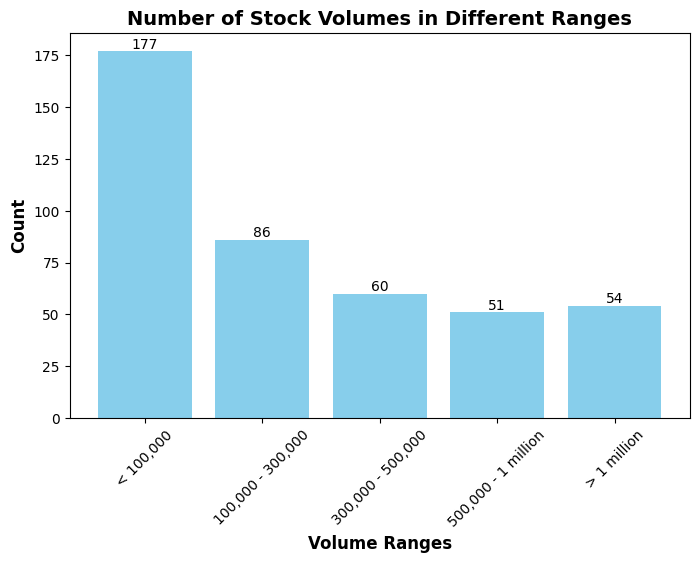

In [19]:
# Define the volume ranges and corresponding counts
volume_ranges = ['< 100,000', '100,000 - 300,000', '300,000 - 500,000', '500,000 - 1 million', '> 1 million']
volume_counts = [count_below_100k, count_between_100k_and_300k, count_between_300k_and_500k, count_between_500k_and_1m, count_above_1m]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(volume_ranges, volume_counts, color='skyblue')
plt.title('Number of Stock Volumes in Different Ranges', fontsize=14, fontweight='bold')
plt.xlabel('Volume Ranges', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')

# Annotate each bar with its respective value
for i, count in enumerate(volume_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.show()

#### <span style="color:#B4F3FC;">**2.1.2. DRAWING GRAPHS SHOWING NUMBER OF STOCKS PER SECTOR AND DISTRIBUTION OF STOCK VOLUME GROUPS**</span>

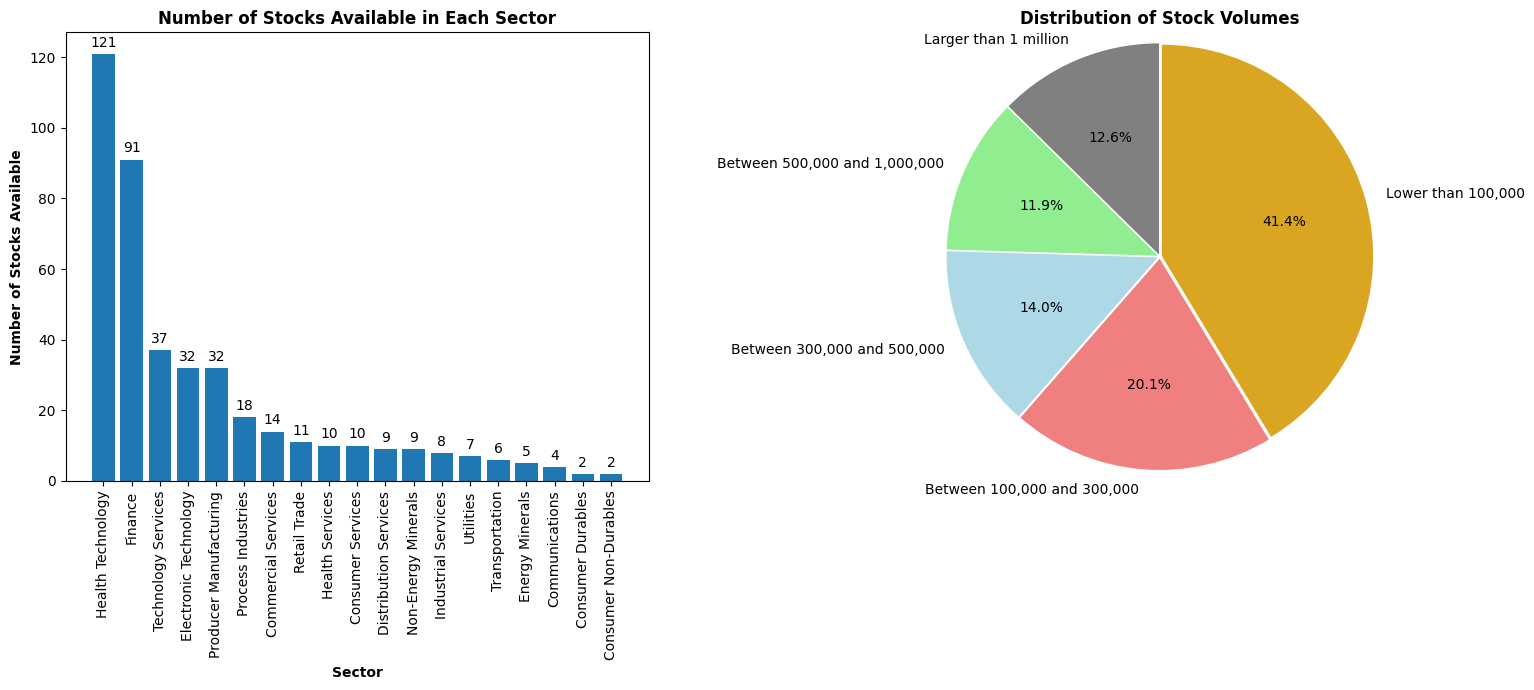

In [20]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 7))

# Set the background color for the entire figure
fig.patch.set_facecolor('white')

# -------------------------
# Graph 1: Number of Stocks per Sector
# -------------------------
sector_counts = data_for_all['Sector'].value_counts()
sector_counts = sector_counts.rename_axis('Sector').reset_index(name='Number of stocks available')
ax1 = axs[0]
bars = ax1.bar(sector_counts['Sector'], sector_counts['Number of stocks available'])

# Set the title and labels for Graph 1
ax1.set_title('Number of Stocks Available in Each Sector', fontweight='extra bold')
ax1.set_xlabel('Sector', fontweight='bold')
ax1.set_ylabel('Number of Stocks Available', fontweight='bold')
ax1.tick_params(axis='x', rotation=90)  # Rotate x-axis labels if needed

# Annotate each bar with its respective value
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# -------------------------
# Graph 2: Distribution of Stock Volumes
# -------------------------
ax2 = axs[1]

# Counting results
counts = [count_below_100k, count_between_100k_and_300k, count_between_300k_and_500k, count_between_500k_and_1m, count_above_1m]

# Labels for the pie chart
labels = [
    'Lower than 100,000',
    'Between 100,000 and 300,000',
    'Between 300,000 and 500,000',
    'Between 500,000 and 1,000,000',
    'Larger than 1 million'
]

# Colors for the pie chart slices
colors = ['goldenrod', 'lightcoral', 'lightblue', 'lightgreen', 'gray']

# Create the pie chart with appropriate settings
ax2.pie(counts, explode=(0.01, 0.01, 0.01, 0.01, 0.01), labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False)

# Set the title for Graph 2
ax2.set_title("Distribution of Stock Volumes", fontweight='extra bold')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax2.axis('equal')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the figure with subplots
plt.show()

<span style="color:#B4F3FC;">**COMMENTS**</span>
*As can be seen from the bar chart, in the given dataset, stocks in the Health Technology sector accounts for a large portion (more than 28%), followed by the Finance sector (around 21.5%). Other sectors with similar number of stocks available are Technology Services, Electronic Technology and Producer Manufacturing. Surprisingly, Consumer Durables and Consumer Non-durables account for only about 0.5% of the stocks in the given dataset. Part of the reason can be resulted from the bias of the dataset, since it is scraping the first 500 stocks in over 5000 stocks available on TradingView.*

*Of the 428 stocks analyzed, 41.4% of them has the stock volume of lower than 100,000 units. It is also worth noting that 11.2% of the stock has the volume of over 1 million, but most of the stock volumes focus in the range from lower than 100,000 to around 300,000.*

### <span style="color:#F6CCFD;">**2.2. SCATTERPLOT SHOWING RELATIONSHIP BETWEEN THE PRICE AND MARKET CAP OF STOCKS**</span>
*Note: This scatterplot only focuses on stocks with Market Cap of under 1.4 Billion and Price of under 200 USD since drawing a scatterplot within this range will better describe the relationship between these two variables.*

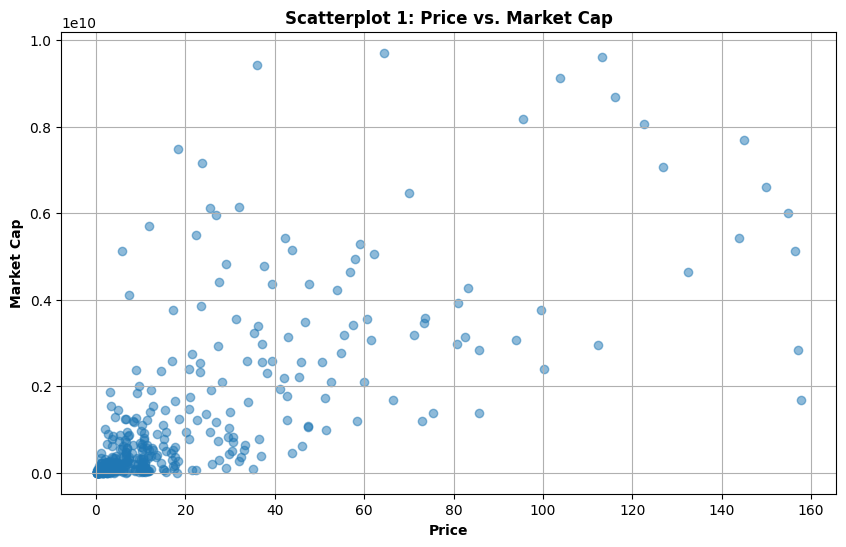

In [21]:
# Scatterplot for Price vs. Market Cap
plt.figure(figsize=(10, 6))
plt.scatter(data_for_all['Price'], data_for_all['Market Cap'], alpha=0.5)
plt.title('Scatterplot 1: Price vs. Market Cap', fontweight='bold')
plt.xlabel('Price', fontweight='bold')
plt.ylabel('Market Cap', fontweight='bold')

# Add a grid for better visualization
plt.grid(True)

# Show the scatterplot
plt.show()

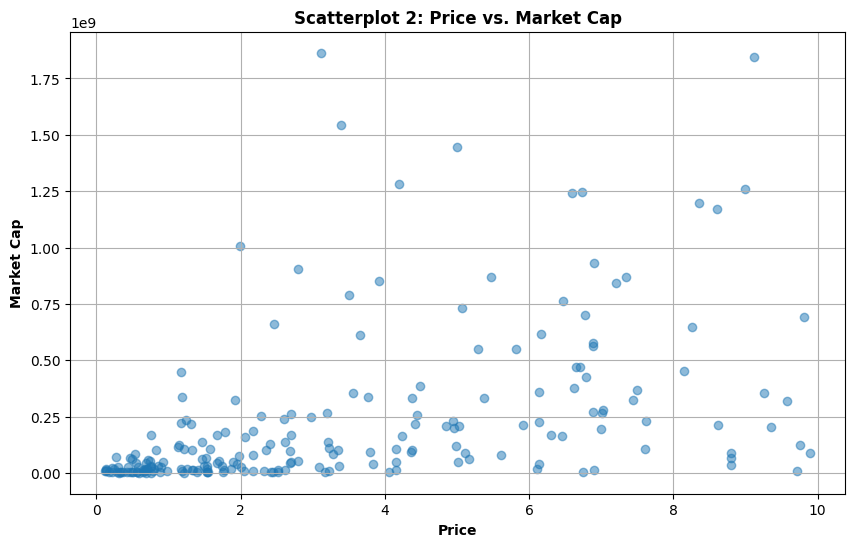

In [22]:
# Filter the data based on conditions
filtered_data1 = data_for_all[(data_for_all['Market Cap'] < 0.2e10) & (data_for_all['Price'] < 10)]

# Create the scatterplot with filtered data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data1['Price'], filtered_data1['Market Cap'], alpha=0.5)
plt.title('Scatterplot 2: Price vs. Market Cap', fontweight='bold')
plt.xlabel('Price', fontweight='bold')
plt.ylabel('Market Cap', fontweight='bold')

# Add a grid for better visualization
plt.grid(True)

# Show the scatterplot
plt.show()


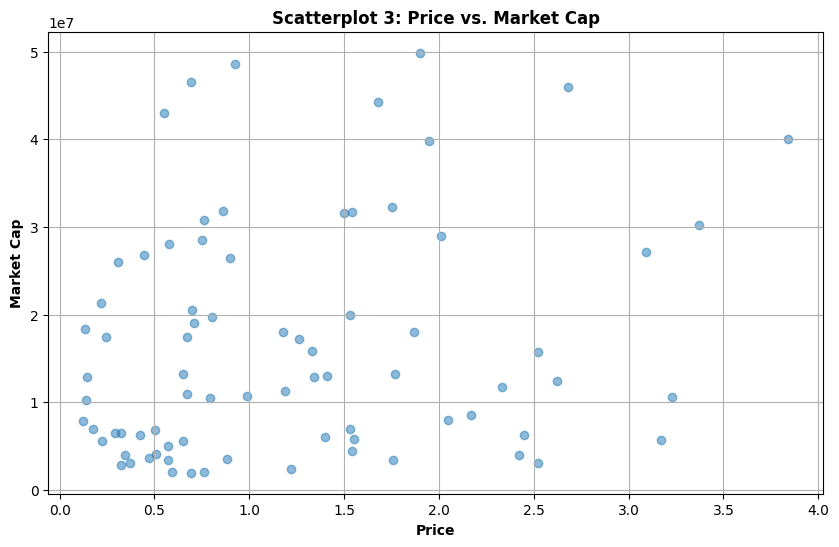

In [23]:
# Filter the data based on conditions
filtered_data2 = data_for_all[(data_for_all['Market Cap'] < 0.5e8) & (data_for_all['Price'] < 4)]

# Create the scatterplot with filtered data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data2['Price'], filtered_data2['Market Cap'], alpha=0.5)
plt.title('Scatterplot 3: Price vs. Market Cap', fontweight='bold')
plt.xlabel('Price', fontweight='bold')
plt.ylabel('Market Cap', fontweight='bold')

# Add a grid for better visualization
plt.grid(True)

# Show the scatterplot
plt.show()


<span style="color:#B4F3FC;">**COMMENTS**</span>
*The three scatter plots above show the distribution between the Market Cap and the Price of Stocks in the US market. When looking at the first two scatter plots,it seems like all the data focus at the range of Market Cap under 0.2e10 (2 Billion) and the price range under 50$ for most of the stocks. When running the 2nd scatter plot, we focus on the areas where the data is most concentrated, so we can look for a trend in them. Yet again, the data shows nothing. That is why the 3rd scatter plot is drawn to look for trends in the data set. The conclusion we draw is that because the data source is too scattered, there is no specific trend shown through drawing scatter plots.*

### <span style="color:#F6CCFD;">**2.3. HEATMAP SHOWING THE RELATIONSHIP BETWEEN STOCK IN DIFFERENT PRICE GROUPS AND RECOMMENDATION FOR INVESTMENTS (MADE BY SPECIALISTS)**</span>

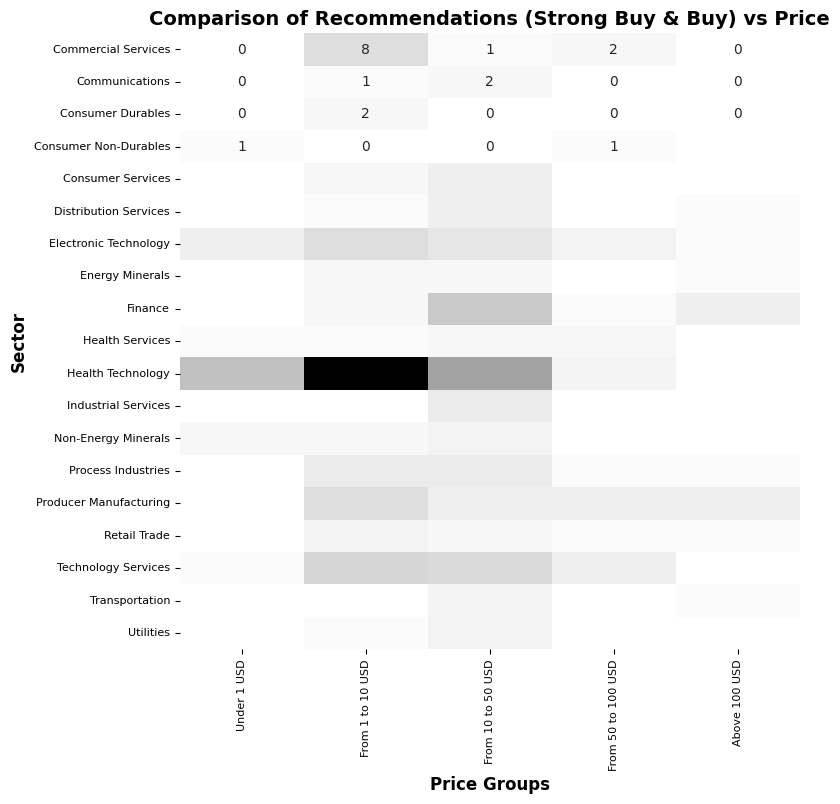

In [25]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the first heatmap (Strong Buy)
sns.heatmap(heatmap_strong_buy, cmap='bone', annot=True, fmt='d', cbar=False, ax=axes[0])
axes[0].set_title('Strong Buy Recommendations vs Price', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price Groups', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Sector', fontsize=12, fontweight='bold')
axes[0].tick_params(axis='both', labelsize=8)

# Plot the second heatmap (Buy)
sns.heatmap(heatmap_buy, cmap='pink', annot=True, fmt='d', cbar=False, ax=axes[1])
axes[1].set_title('Buy Recommendations vs Price', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Price Groups', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Sector', fontsize=12, fontweight='bold')
axes[1].tick_params(axis='both', labelsize=8)

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined heatmaps
plt.show()


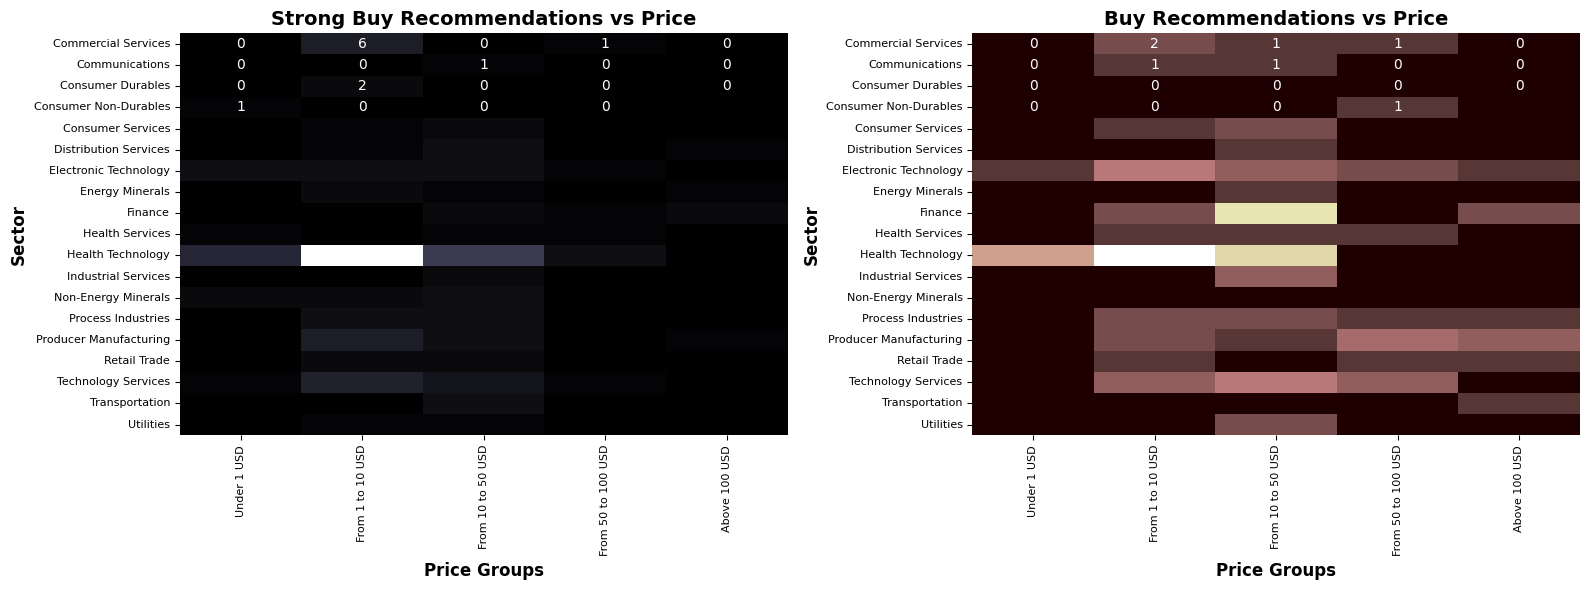

In [26]:
# Replace 'Strong Buy' and 'Buy' with numeric values for the heatmap
data_for_all['Strong_Buy_numeric'] = data_for_all['Recommendation'].apply(lambda x: 1 if x == 'Strong Buy' else 0)
data_for_all['Buy_numeric'] = data_for_all['Recommendation'].apply(lambda x: 1 if x == 'Buy' else 0)

# Group 'Price' into new price groups
price_bins = [0, 1, 10, 50, 100, float('inf')]
price_labels = ['Under 1 USD', 'From 1 to 10 USD', 'From 10 to 50 USD', 'From 50 to 100 USD', 'Above 100 USD']
data_for_all['Price_Group'] = pd.cut(data_for_all['Price'], bins=price_bins, labels=price_labels, right=False)

# Create pivot tables to prepare the data for the heatmap
heatmap_strong_buy = data_for_all.pivot_table(index='Sector', columns='Price_Group', values='Strong_Buy_numeric', aggfunc='sum')
heatmap_buy = data_for_all.pivot_table(index='Sector', columns='Price_Group', values='Buy_numeric', aggfunc='sum')

# Combine the two heatmaps
combined_heatmap = heatmap_strong_buy + heatmap_buy

# Create the heatmap
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
sns.heatmap(combined_heatmap, cmap='binary', annot=True, fmt='d', cbar=False)
plt.title('Comparison of Recommendations (Strong Buy & Buy) vs Price', fontsize=14, fontweight='bold')
plt.xlabel('Price Groups', fontsize=12, fontweight='bold')
plt.ylabel('Sector', fontsize=12, fontweight='bold')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8, rotation=0)
plt.show()

|<span style="color:#B4F3FC;">**COMMENTS**</span>
*The heatmap provide an indepth relationship between the price and recommendations from experts. As we can see, most of the recommendations is concentrated in the price range 'from 1 to 10 USD' and 'from 10 to 50 USD' (mostly the 'from 10 to 50 USD') and the two sector of 'Health Technology' and 'Technology Services' received the most recommendations such as Buy or Strong Buy from experts.*

### <span style="color:#F6CCFD;">**2.4. SUMMARIZING MEAN, VARIANCE, COVARIANCE AND CORRELATION BETWEEN DIFFERENT VARIABLES**</span>

In [27]:
# Select columns of interest
selected_columns = ['Price', 'Volume', 'Market Cap']
data_for_all = data_for_all[selected_columns]

# Calculate statistics
means = data_for_all.mean().round(2)
variances = data_for_all.var().round(2)
cov_matrix = data_for_all.cov().round(2)
corr_matrix = data_for_all.corr().round(2)

# Create a summary table
summary_table = pd.DataFrame({
    'Mean': means,
    'Variance': variances,
    'Covariance with Price': cov_matrix['Price'],
    'Covariance with Volume': cov_matrix['Volume'],
    'Covariance with Market Cap': cov_matrix['Market Cap'],
    'Correlation with Price': corr_matrix['Price'],
    'Correlation with Volume': corr_matrix['Volume'],
    'Correlation with Market Cap': corr_matrix['Market Cap'],
})

print(summary_table)

                    Mean      Variance  Covariance with Price  \
Price       1.981000e+01  8.481900e+02           8.481900e+02   
Volume      3.970262e+05  3.444793e+11           4.177365e+05   
Market Cap  1.127110e+09  3.407830e+18           3.836690e+10   

            Covariance with Volume  Covariance with Market Cap  \
Price                 4.177365e+05                3.836690e+10   
Volume                3.444793e+11                4.069080e+14   
Market Cap            4.069080e+14                3.407830e+18   

            Correlation with Price  Correlation with Volume  \
Price                         1.00                     0.02   
Volume                        0.02                     1.00   
Market Cap                    0.71                     0.38   

            Correlation with Market Cap  
Price                              0.71  
Volume                             0.38  
Market Cap                         1.00  


<span style="color:#B4F3FC;">**COMMENTS**</span>
*The mean provides information about the central location of data, while the variance provides information about how the data is spread around the mean. The reason why the pie chart has upto 5 different categories since the variance between the Volume is so high. It happened to the scatter plot as well, the data scattered all the way up to the market cap of 1.2e10 (or 12 billion) even after data cleaning. One thing showed that the data is too scattered and there's no visible trend among the data collected*

*Based on the covariances and correlations calculated for the three main columns – Price, Volume, and Market Cap – it becomes evident that there are notable relationships among these variables.*

*Price and Market Cap: The positive covariance and correlation coefficient between Price and Market Cap indicate a strong positive linear relationship between these two variables. This implies that as the Price of a stock increases, its Market Cap tends to increase as well. Investors often use Market Cap as an indicator of a company's size and value, and this relationship suggests that higher-priced stocks are associated with larger market capitalizations.*

*Volume and Market Cap: Similarly, the positive covariance and correlation coefficient between Volume and Market Cap suggest a positive linear relationship. In other words, as the trading Volume of a stock increases its Market Cap tends to increase too. This relationship may reflect higher liquidity and trading activity in stocks with larger market capitalizations, making them attractive to investors.*

*Price and Volume: The covariance and correlation between Price and Volume indicate little to no significant linear relationship between these two variables. This suggests that changes in the Price of a stock do not strongly influence its trading Volume, and vice versa. Stocks with different Prices can exhibit similar trading Volumes, and vice versa. This independence between Price and Volume might be due to various factors affecting trading activity that are not solely dependent on the stock's Price.*

*In conclusion, the analysis of covariances and correlations provides valuable insights into the relationships among Price, Volume, and Market Cap. While Price and Market Cap, as well as Volume and Market Cap, show strong positive associations, Price and Volume appear to be relatively independent of each other. Understanding these relationships can assist investors and analysts in making informed decisions about stocks and their investment strategies.*

,Price,Volume,Market Cap
0,10.73,4869.0,7.572310e+08
1,10.70,199.0,9.863600e+07
2,10.26,104531.0,5.130000e+08
3,4.99,189059.0,1.223540e+08
4,6.90,49492.0,1.213300e+07
...,...,...,...
423,26.92,1983000.0,5.968000e+09
424,2.35,146862.0,1.025940e+08
425,20.75,1046000.0,2.408000e+09
426,2.62,22893.0,1.238000e+07
